In [33]:
import xarray as xr
from matplotlib import pyplot as plt
import gfdl_utils as gu
import numpy as np

In [15]:
# Specify budget terms
terms = {}
terms['heat'] = ['opottemptend','T_advection_xy','Th_tendency_vert_remap',
                 'boundary_forcing_heat_tendency','opottempdiff','opottemppmdiff','frazil_heat_tendency','internal_heat_heat_tendency']
terms['salt'] = ['osalttend','S_advection_xy','Sh_tendency_vert_remap',
                 'boundary_forcing_salt_tendency','osaltdiff','osaltpmdiff']

In [16]:
# Load data on native grid
pathDict = {'pp':('/archive/Raphael.Dussin/'+
                  'FMS2019.01.03_devgfdl_20210706/'+
                  'CM4_piControl_c192_OM4p125_v5/'+
                  'gfdl.ncrc4-intel18-prod-openmp/pp'),
           'ppname':'ocean_monthly_z_d2',
           'out':'av',
           'local':'monthly_5yr',
           'time':'0051*',
           'add':'*'}

path = gu.core.get_pathspp(**pathDict)
ds = gu.core.open_frompp(**pathDict).isel(time=0)

In [17]:
# Define a function to sum up the terms on the LHS and RHS of the tracer conservation equation
def calc_budget(ds,terms):
    lhs = xr.Dataset()
    rhs = xr.Dataset()
    for key in terms.keys():
        lhs[key] = xr.zeros_like(ds[terms[key][0]])
        for term in terms[key][0:3]:
            # Flip the sign for the advective tendencies
            if term in ['opottemptend','osalttend','dhdt']:
                sign=1
            else:
                sign=-1
            lhs[key] += sign*ds[term]
        rhs[key] = xr.zeros_like(ds[terms[key][3]])
        for term in terms[key][3:]:
            sign=1
            rhs[key] += sign*ds[term]
    return lhs, rhs

In [18]:
# Close budget
lhs,rhs = calc_budget(ds,terms)
vertind='z_l'

AttributeError: 'QuadMesh' object has no property 'robust'

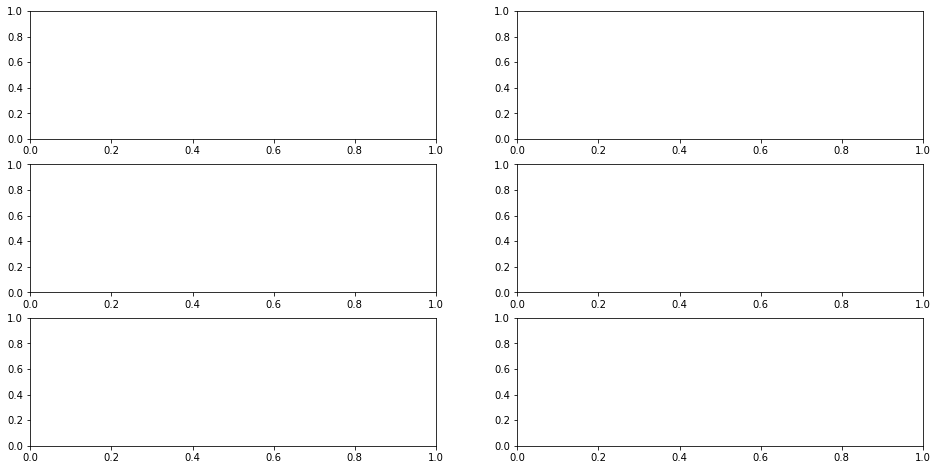

In [20]:
# Plot the vertical sum
fig,ax = plt.subplots(figsize=(16,8),nrows=3,ncols=2)
count=0
for key in terms.keys():
    # LHS
    im = ax[0,count].pcolormesh(lhs[key].sum(vertind).squeeze())
    plt.colorbar(im,ax=ax[0,count])
    ax[0,count].set_title(key)
    # RHS
    im = ax[1,count].pcolormesh(rhs[key].sum(vertind).squeeze())
    plt.colorbar(im,ax=ax[1,count])
    # Difference
    im = ax[2,count].pcolormesh((lhs[key]-rhs[key]).sum(vertind).squeeze())
    plt.colorbar(im,ax=ax[2,count])
    count+=1
ax[0,0].set_ylabel('LHS')
ax[1,0].set_ylabel('RHS')
ax[2,0].set_ylabel('difference')
plt.tight_layout()

In [40]:
(lhs['heat'].sum('z_l')).where(lhs['heat'].sum('z_l')>10000,drop=True)

<xarray.DataArray 'heat' (yh: 1, xh: 2)>
dask.array<where, shape=(1, 2), dtype=float32, chunksize=(1, 2), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -43.88 -43.61
  * yh       (yh) float64 -0.125
    time     object 0055-01-16 12:00:00

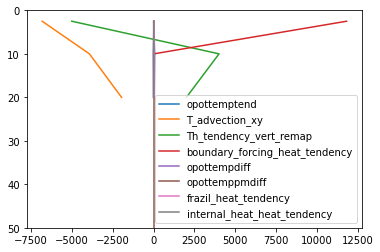

In [53]:
dsnow = ds.sel(xh=-43.88,yh=-0.125,method='nearest')
for term in terms['heat']:
    plt.plot(dsnow[term],dsnow['z_l'],label=term)
plt.legend()
plt.gca().set_ylim([0,50])
plt.gca().invert_yaxis()

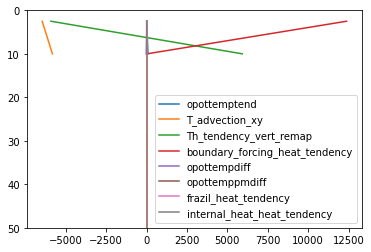

In [54]:
dsnow = ds.sel(xh=-43.61,yh=-0.125,method='nearest')
for term in terms['heat']:
    plt.plot(dsnow[term],dsnow['z_l'],label=term)
plt.legend()
plt.gca().set_ylim([0,50])
plt.gca().invert_yaxis()

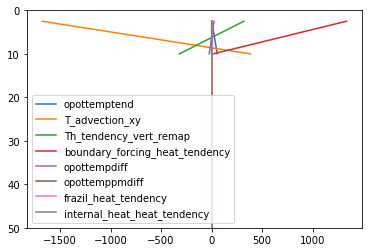

In [55]:
dsnow = ds.sel(xh=-43.34,yh=-0.125,method='nearest')
for term in terms['heat']:
    plt.plot(dsnow[term],dsnow['z_l'],label=term)
plt.legend()
plt.gca().set_ylim([0,50])
plt.gca().invert_yaxis()